# Timeseries Data Analysis - Macrophage LPS Treatment

This Jupyter Notebook walks through the analysis of time series data from FANTOM. This dataset comprises macrophage treatment with LPS at early and late timepoints capturing CAGE data.

# Table of Contents
1. [Initialize](#Initialize)<br>
2. [Run TFEA and AME](#Run-TFEA-and-AME)<br>
3. [Main Figure](#Main-Figure)<br>
    3.1 [TFEA vs. AME Time Series Analysis](#TFEA-vs.-AME-Time-Series-Analysis)<br>

## Initialize

In [2]:
#Imports
#==================================================================================================
#Add user installed python packages and TFEA
import sys
sys.path.insert(0, "/Users/joru1876/.local/lib/python3.6/site-packages/")
sys.path.insert(0, "/Users/joru1876/TFEA/")
# sys.path.insert(0, "/scratch/Users/joru1876/TFEA/TFEA/")

#Add MEME and Sbatch to path
import os
os.environ['PATH'] = '/Users/joru1876/meme/bin:' + os.environ['PATH'] + ':/opt/slurm-19.05.2/bin/:/Users/joru1876/TFEA/TFEA'

import math
from scipy import stats
import numpy as np
from pathlib import Path
import subprocess
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize

from IPython.display import FileLink

import TFEA

sbatch = '''#!/bin/bash

###Name the job
#SBATCH --job-name={name}

###Specify the queue
#SBATCH -p short

###Specify WallTime
#SBATCH --time=24:00:00

### Specify the number of nodes/cores
#SBATCH --ntasks=10

### Allocate the amount of memory needed
#SBATCH --mem=50gb

### Setting to mail when the job is complete
#SBATCH --error {e_and_o}/%x.err
#SBATCH --output {e_and_o}/%x.out

### Set your email address
#SBATCH --mail-type=ALL
#SBATCH --mail-user=jonathan.rubin@colorado.edu

module purge
module load python/3.6.3
module load meme/5.0.3
module load bedtools
module load samtools/1.8
module load gcc/7.1.0

###Run TFEA
python3 /Users/joru1876/TFEA/TFEA --ranked_file {ranked_file} \
--output {TFEA_output} --output_type 'txt' \
--genomefasta {genomefasta} \
--cpus 10 --fimo_motifs {motifs} --debug

###Run AME
/Users/joru1876/meme-5.0.5/src/ame --noseq --evalue-report-threshold 1000 \
--oc {TFEA_output}/ame --bfile {TFEA_output}/temp_files/markov_background.txt \
{TFEA_output}/temp_files/ranked_file.fa {motifs}

###Move text file to root directory
mv {TFEA_output}/results.txt {base_output}_TFEA.txt
mv {TFEA_output}/ame/ame.tsv {base_output}_AME.txt

###Delete the rest of the TFEA output including the simulated fasta file
rm -r {TFEA_output}
'''

#Functions
def parse_results(folder, pattern='*', ame=False):
    results = {}
    folder = Path(folder)
    for file in folder.glob(pattern):
        key = int(file.stem.split('_')[1])
        i = int(file.stem.split('_')[2])
        if key not in results:
            results[key] = {}
        results[key][i] = []
        with open(file) as F:
            F.readline()
            for line in F:
                linelist = line.strip().split('\t')
                if ame:
                    try:
                        results[key][i].append([linelist[2]] + linelist[5:])
                    except:
                        pass
                else:
                    results[key][i].append([linelist[0]] + [float(x) for x in linelist[1:]])
        results[key][i] = sorted(results[key][i])
    return results

def flatten(pdf_file):
    pdf_file = str(pdf_file)
    output = pdf_file.replace('.pdf', '_flat.pdf')
    subprocess.call('/usr/bin/pdf2ps ' + pdf_file + ' - | /usr/bin/ps2pdf - ' + output, shell=True)
    return output

# Run TFEA and AME

In [3]:
savedir = '/Users/joru1876/TFEA_Jupyter/Macrophage_LPS_FANTOM/TFEA/'
e_and_o = '/Users/joru1876/TFEA_Jupyter/Macrophage_LPS_FANTOM/TFEA/e_and_o'
motif_database='/Users/joru1876/TFEA/motif_files/HOCOMOCOv11_core_HUMAN_mono_meme_format.meme'
genomefasta = '/scratch/Shares/public/genomes/Homo_sapiens/UCSC/hg19/Sequence/WholeGenomeFasta/genome.fa'
ranked_files = '/Users/joru1876/TFEA_Jupyter/Macrophage_LPS_FANTOM/processed_data/'

for ranked_file in Path(ranked_files).glob('*.bed'):
    basename = ranked_file.stem.replace('_ranked_file', '')
    print(basename)
    script_file = Path(savedir) / f'TFEA_{basename}.sbatch'
    script_file.write_text(sbatch.format(name=basename,
                                           ranked_file=ranked_file,
                                           genomefasta=genomefasta,
                                           e_and_o=e_and_o,
                                           TFEA_output=savedir+basename,
                                           base_output=savedir+basename,
                                           motifs=motif_database))
    subprocess.call(['sbatch', script_file])

00hr00mindonor3_22hrdonor3
00hr00mindonor2_02hr30mindonor2
00hr00mindonor2_36hrdonor2
00hr00mindonor2_12hrdonor2
00hr00mindonor3_03hr00mindonor3
00hr00mindonor3_16hrdonor3
00hr00mindonor3_12hrdonor3
00hr00mindonor2_02hr00mindonor2
00hr00mindonor2_16hrdonor2
00hr00mindonor3_36hrdonor3
00hr00mindonor2_22hrdonor2
00hr00mindonor3_03hr30mindonor3
00hr00mindonor3_02hr00mindonor3
00hr00mindonor1_12hrdonor1
00hr00mindonor2_03hr30mindonor2
00hr00mindonor1_36hrdonor1
00hr00mindonor3_02hr30mindonor3
00hr00mindonor1_22hrdonor1
00hr00mindonor2_03hr00mindonor2
00hr00mindonor1_02hr30mindonor1
00hr00mindonor1_05hrdonor1
00hr00mindonor3_01hr00mindonor3
00hr00mindonor2_00hr30mindonor2
00hr00mindonor2_01hr00mindonor2
00hr00mindonor1_03hr00mindonor1
00hr00mindonor3_00hr30mindonor3
00hr00mindonor3_05hrdonor3
00hr00mindonor2_05hrdonor2
00hr00mindonor2_24hrdonor2
00hr00mindonor3_01hr20mindonor3
00hr00mindonor3_20hrdonor3
00hr00mindonor3_00hr15mindonor3
00hr00mindonor3_04hrdonor3
00hr00mindonor3_14hrdonor3
00

# Main Figure

## TFEA vs. AME Time Series Analysis

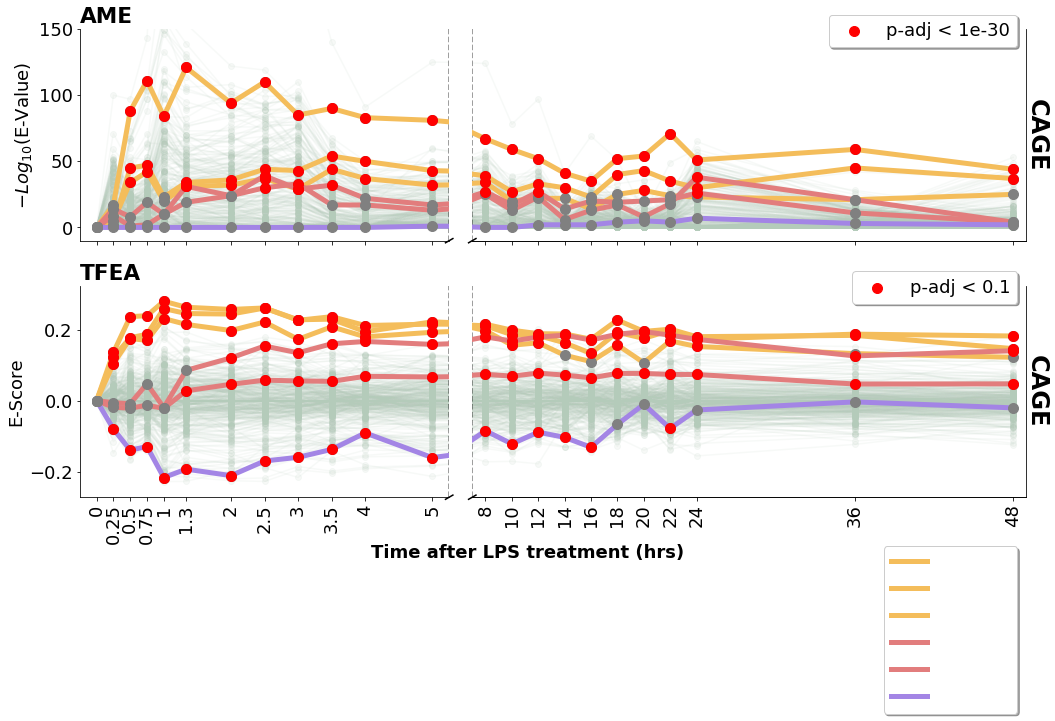

/Users/joru1876/TFEA_Jupyter/Macrophage_LPS_FANTOM/figures/FANTOM_MacrophageLPS_timeseries_TFEAandAME_flat.pdf

In [4]:
def parse_results(parent_folder, ame=False):
    results = {}
    if ame:
        pattern = '*AME.txt'
    else:
        pattern = '*TFEA.txt'
    for result_file in Path(parent_folder).glob(pattern):
        info = result_file.name.split('_')
        exp = info[1].split('donor')
        donor = 'donor' + exp[1]
        time = exp[0]
        if 'min' in time:
            hour, minute = time.strip('min').split('hr')
            time = int(hour) + int(minute)/60
        else:
            time = int(time.strip('hr'))
        if donor not in results:
            results[donor] = {}
        if ame:
            result_list = [line.split('\t') for line in result_file.read_text().split('\n')[1:] if len(line.split('\t')) > 1 and '#' not in line.split('\t')[0]]
            result_list = [[line[2]] + [x for x in line[5:]] for line in result_list]
        else:
            result_list = [line.split('\t') for line in result_file.read_text().split('\n')[:-1] if '#' not in line[0]]
            result_list = [[line[0]] + [float(x) for x in line[1:-1]] for line in result_list]
        results[donor][time] = result_list
    return results

def plot_all_time_results(results, motifs, color_cycle=None, limits=None):
    F = plt.figure(figsize=(15,8))
    donors = sorted([key for key in results.keys()])
    outer = gridspec.GridSpec(len(donors), 1, hspace=0.45)
    for i, donor in enumerate(donors, 0):
        if donor == 'AME':
            ame = True
            p_cut = 1e-30
            limits = [-10,150]
        else:
            limits = None
            ame = False
            p_cut = 1e-1
        inner = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[i], wspace=0.05, width_ratios=[2,3])
        ax_l = F.add_subplot(inner[0])
        ax_r = F.add_subplot(inner[1])
#         ax = F.add_subplot(len(donors),1,i)
#         ax.text(1,0.15,donor)
        ax_l.set_title(donor, loc='left', fontweight='bold')
        if i == len(donors)-1:
            plot_single_time_results(results[donor], ax=ax_l, motifs=motifs, p_cut=p_cut, ame=ame, color_cycle=color_cycle, ticks=True)
            plot_single_time_results(results[donor], ax=ax_r, motifs=motifs, p_cut=p_cut, ame=ame, color_cycle=color_cycle, ticks=True)
        else:
            plot_single_time_results(results[donor], ax=ax_l, motifs=motifs, p_cut=p_cut, ame=ame, color_cycle=color_cycle)
            plot_single_time_results(results[donor], ax=ax_r, motifs=motifs, p_cut=p_cut, ame=ame, color_cycle=color_cycle)
        ax_l.set_xlim([-0.25, 5.25])
        ax_l.axvline(5.25, linestyle='--', c='k', alpha=0.5)
        ax_r.set_xlim([7, 49])
        ax_r.axvline(7, linestyle='--', c='k', alpha=0.5)
        if limits == None:
            limits = [min(ax_l.get_ylim()[0], ax_r.get_ylim()[0]), max(ax_l.get_ylim()[1], ax_r.get_ylim()[1])]
        ax_l.set_ylim(limits)
        ax_r.set_ylim(limits)
        
        #Draw cuts in plot
        d=0.01
        kwargs = dict(transform=ax_l.transAxes, color='k', clip_on=False)
        ax_l.plot((1-d, 1+d), (-d, +d), **kwargs)
        kwargs.update(transform=ax_r.transAxes)
#         ax_r.plot((-d/3.0, +d/3.0), (-d, +d), **kwargs)
        dx = d*2/3
        ax_r.plot((-dx, +dx), (-d, +d), **kwargs)
        if ame:
            ax_l.set_ylabel('$-Log_{10}$(E-Value)')
        else:
            ax_l.set_ylabel('E-Score')
        ax_r.set_yticks([])
        ax_r.spines['left'].set_visible(False)
        axR = ax_r.twinx()
        axR.set_ylabel("CAGE", rotation=270, labelpad=22, fontweight='bold', fontsize=24)
        axR.axes.get_yaxis().set_ticks([])
        axR.spines['top'].set_visible(False)
        axR.spines['left'].set_visible(False)
        
        #All this for the p-adj legend
#         axL = ax_l.twinx()
#         axL.axes.get_yaxis().set_ticks([])
#         for spine in axL.spines:
#             axL.spines[spine].set_visible(False)
        dummy_scatter = axR.scatter([1], [0], c='r', s=100, label=f'p-adj < {p_cut}')
        axR.legend(bbox_to_anchor=(0.9, 1.1, 0.1, 0.01), loc='upper right', shadow=True) #frameon=False)
        dummy_scatter.remove()
        
    outer.tight_layout(F)
    F.text(0.5, 0.01, 'Time after LPS treatment (hrs)', ha='center', fontweight='bold')
#     dummy_scatter = ax_r.scatter([1], [0], c='r', s=100, label=f'p < {p_cut}')
    ax_r.legend(bbox_to_anchor=(0.9, -0.2, 0.1, 0.01), shadow=True)#frameon=False)
#     dummy_scatter.remove()
#     plt.tight_layout()
    
    return F

def plot_single_time_results(results, motifs=[], ax=None, x_index=2, ame=False, motif_i=0, events_i=3, label='', 
                              ticks=False, p_cut=1e-7, p_i=-1, color_cycle=None):
    
    sorted_keys = sorted([key for key in results.keys()])
    xvals = [0] + sorted_keys
    
    if ame:
        p_i = 1
        all_results = [[0 for x in sorted(results[sorted_keys[0]], key=lambda x: x[0])]] + [[-math.log(float(x[x_index]),10) if 'e' not in x[x_index] else float(x[x_index].split('e')[-1].strip('-')) for x in sorted(results[key], key=lambda x: x[0])] for key in sorted_keys]# + [[[-math.log(float(x2[x_index]),10) if 'e' not in x2[x_index] else float(x2[x_index].split('e')[-1].strip('-')) for x2 in sorted(x, key=lambda x: x[0])] for x in results[key]][0] for key in sorted_keys]
    else:
        all_results = [[0 for x in sorted(results[sorted_keys[0]], key=lambda x: x[0])]] + [[x[x_index] for x in sorted(results[key], key=lambda x: x[0])] for key in sorted_keys]

    ax.scatter([[xvals[i] for j in range(len(all_results[i]))] for i in range(len(all_results))], all_results, color='#b4cbba', alpha=0.1, zorder=1)
    all_results = np.array(all_results).T
    for motif_per_timepoint in all_results:
        ax.plot(xvals, motif_per_timepoint, color='#b4cbba', alpha=0.1, zorder=2)
    
    only_one_motif = len(motifs) == 1
    for i, motif_list in enumerate(motifs):
        for motif in motif_list:
            list_flatten = lambda l: [item for sublist in l for item in sublist]
            if ame:
                motif_results = [[0]] + [[-math.log(float(x[x_index]),10) if 'e' not in x[x_index] else float(x[x_index].split('e')[-1].strip('-')) for x in results[key] if x[motif_i]==motif] for key in sorted_keys]# + [[[-math.log(float(x2[x_index]),10) if 'e' not in x2[x_index] else float(x2[x_index].split('e')[-1].strip('-')) for x2 in x if x2[motif_i] == motif] for x in results[key]][0] for key in sorted_keys]
                significant_i = [[k+1 for x in results[sorted_keys[k]] if x[motif_i]==motif and float(x[p_i]) < p_cut] for k in range(len(sorted_keys))] #[[[k+1 for x2 in x if x2[motif_i] == motif and float(x2[p_i]) < p_cut] for x in results[sorted_keys[k]]][0] for k in range(len(sorted_keys))]
                significant_i = list_flatten(significant_i)
            else:
                motif_results = [[0]] + [[x[x_index] for x in results[key] if x[motif_i]==motif] for key in sorted_keys]
                significant_i = [[k+1 for x in results[sorted_keys[k]] if x[motif_i]==motif and x[p_i] < p_cut] for k in range(len(sorted_keys))]
                significant_i = list_flatten(significant_i)

            if only_one_motif:
                ax.plot(xvals, motif_results, c='r', alpha=0.8, linewidth=5, label=motif.split('_')[0], zorder=3)
            else:
                if color_cycle != None:
                    ax.plot(xvals, motif_results, color=color_cycle[i], linewidth=5, label='            ', zorder=3)
                else:
                    ax.plot(xvals, motif_results, alpha=0.8, linewidth=5, label=motif.split('_')[0], zorder=3)
            ax.scatter([[xvals[i] for j in range(len(motif_results[i]))] for i in range(len(motif_results))], motif_results, s=100, color='gray', zorder=4)
            if len(significant_i) > 0:
                ax.scatter([xvals[i] for i in significant_i], [motif_results[i] for i in significant_i], s=100, color='red', zorder=5)
    if ticks:
        xticks = [0, .25, .5, .75, 1, 1.3333, 2, 2.5, 3, 3.5, 4, 5, 8, 10, 12, 14, 16, 18, 20, 22, 24, 36, 48]
        xlabels = [str("%.2g" % x) for x in xticks]
        ax.get_xaxis().set_ticks(xticks)
        ax.set_xticklabels(xlabels, rotation=90)
#         ax.set_xlabel('Time after LPS treatment (hrs)')
    else:
        ax.get_xaxis().set_ticks(xvals)
        ax.set_xticklabels([])
#     ax.set_xlim([0.05, 0.6])
#     ax.set_ylim([-0.2, 0.2])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

#========================================================================================================
parent_folder ='/Users/joru1876/TFEA_Jupyter/Macrophage_LPS_FANTOM/TFEA'
figuredir = '/Users/joru1876/TFEA_Jupyter/Macrophage_LPS_FANTOM/figures'

motifs = [['TF65_HUMAN.H11MO.0.A','NFKB1_HUMAN.H11MO.1.B', 'RELB_HUMAN.H11MO.0.C'], ['IRF9_HUMAN.H11MO.0.C', 'STAT2_HUMAN.H11MO.0.A'], ['TYY1_HUMAN.H11MO.0.A']]
color_cycle = ['#f4bd5b', '#e27d7d', '#a385e5']
AME_results = parse_results(parent_folder, ame=True)
TFEA_results = parse_results(parent_folder)
combined_results = {}
combined_results['TFEA'] = TFEA_results['donor2']
combined_results['AME'] = AME_results['donor2']

F = plot_all_time_results(combined_results, motifs, color_cycle=color_cycle)

figname = os.path.join(figuredir, 'FANTOM_MacrophageLPS_timeseries_TFEAandAME.pdf')
F.savefig(figname, bbox_inches='tight', format='pdf', transparent=True)
plt.show()
flattened = flatten(figname)
FileLink(str(Path(flattened).relative_to(Path.cwd())))
